<a href="https://colab.research.google.com/github/TahaKazemi/bitcoin-prediction-price/blob/main/LSTMBITCOIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import pickle
import math
from glob import iglob
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from keras.models import Model, load_model, Sequential
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Input, Dense, Dropout, Activation, Embedding, Conv2D, LSTM
from keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from __future__ import print_function
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Embedding, Conv2D
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
with open('/content/gdrive/My Drive/dataset/bitstampUSD.csv', 'r') as f:
  f.read()

In [ ]:
bitcoin = pd.concat((pd.read_csv(f) for f in iglob('/content/gdrive/My Drive/dataset/bitstampUSD.csv', recursive=True)), ignore_index=True)
bitcoin.shape

(4857377, 8)

In [ ]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [ ]:
bitcoin

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [ ]:
bitcoin.shape

(4857377, 8)

Text(0, 0.5, '$ Price')

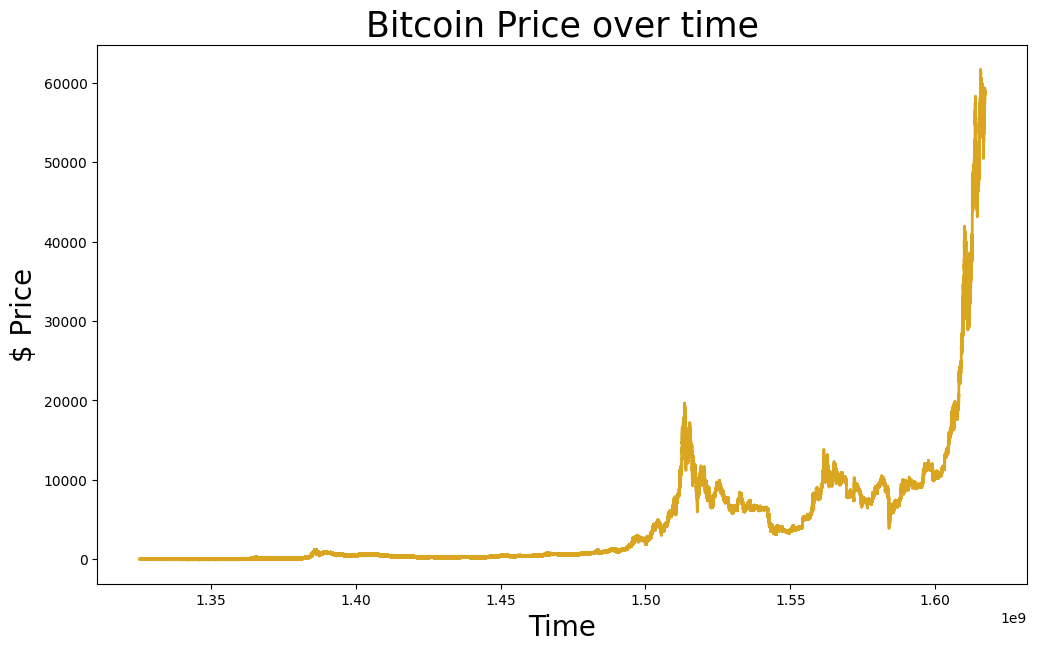

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["Timestamp"], bitcoin["Weighted_Price"], color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

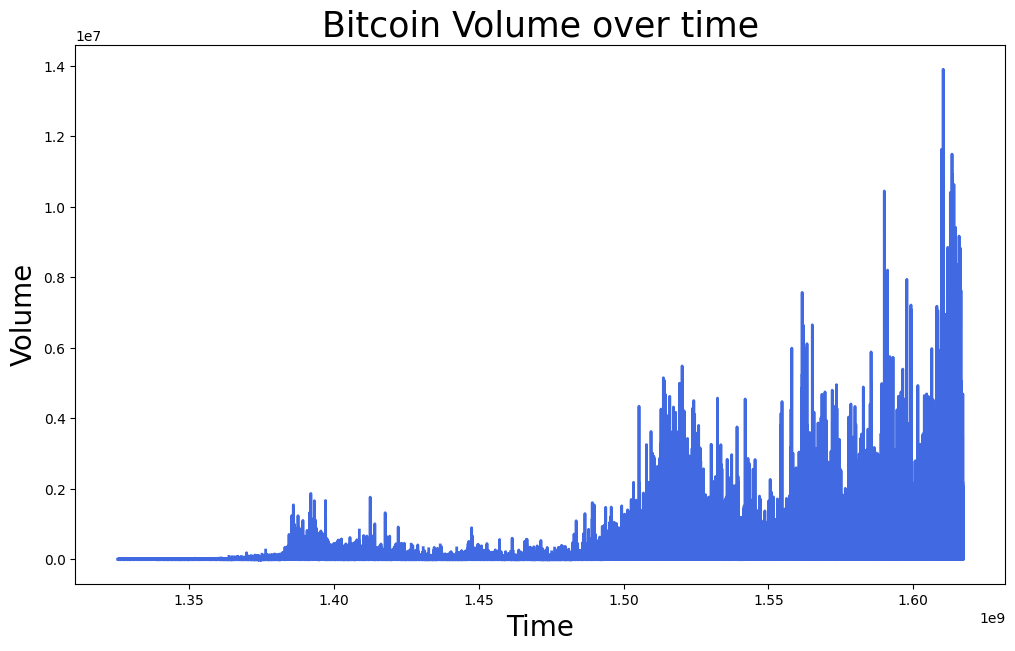

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["Timestamp"], bitcoin["Volume_(Currency)"], color='royalblue', lw=2)
plt.title("Bitcoin Volume over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Volume", size=20);

In [ ]:
bitcoin.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [ ]:
bitcoin = bitcoin.dropna()

In [ ]:
bitcoin.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [ ]:
bitcoin['date'] = pd.to_datetime(bitcoin['Timestamp'],unit='s').dt.date
bitcoin



<ipython-input-13-75d0e86190f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin['date'] = pd.to_datetime(bitcoin['Timestamp'],unit='s').dt.date


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01
...,...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30


In [ ]:
bitcoin.shape


(3613769, 9)

Text(0, 0.5, '$ Price')

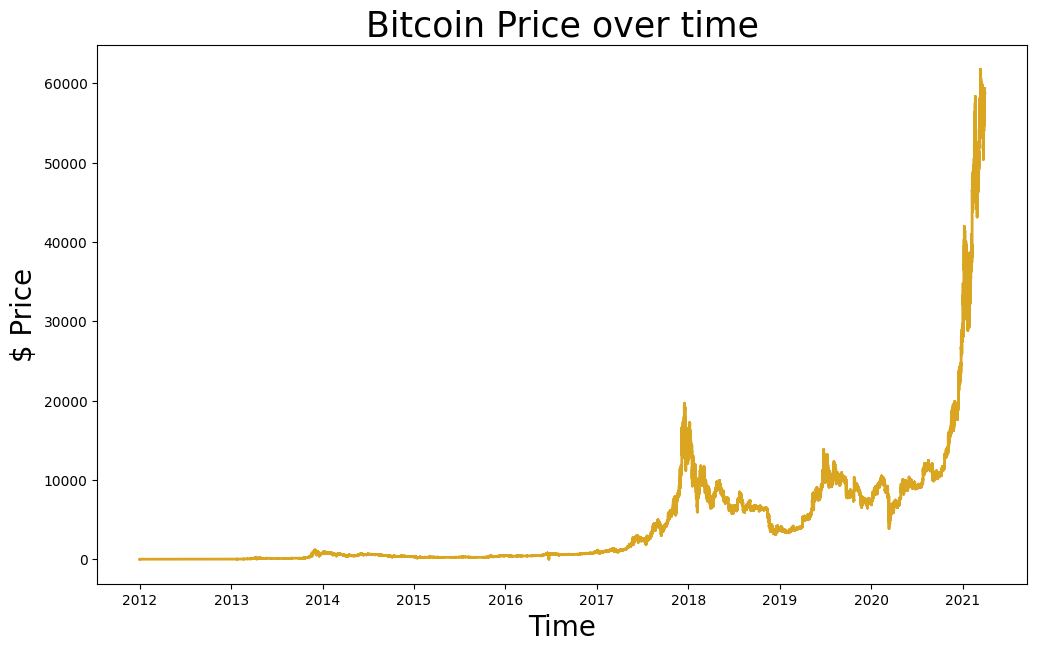

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["date"], bitcoin["Close"], color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [ ]:
grouped_data = bitcoin.groupby('date', as_index = False).mean()
grouped_data



,date,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,1.325342e+09,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
1,2012-01-01,1.325427e+09,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2,2012-01-02,1.325535e+09,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
3,2012-01-03,1.325605e+09,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
4,2012-01-04,1.325682e+09,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159
...,...,...,...,...,...,...,...,...,...
3371,2021-03-27,1.616846e+09,55193.240643,55219.665031,55168.757372,55195.415367,1.823877,100884.732367,55193.357260
3372,2021-03-28,1.616933e+09,55833.608471,55857.735342,55810.425126,55835.012863,1.447939,80632.115263,55832.958824
3373,2021-03-29,1.617019e+09,56914.886595,56946.213593,56885.242967,56915.629993,3.732887,213754.555988,56913.993819
3374,2021-03-30,1.617106e+09,58347.805624,58371.955310,58323.956690,58349.357087,2.363999,138231.241926,58346.912268


In [ ]:
grouped_data.shape

(3376, 9)

In [ ]:
train_size = int(len(grouped_data) * 0.90)
test_size = len(grouped_data) - train_size
df_train = grouped_data.iloc[0:train_size, :]
df_test = grouped_data.iloc[train_size:len(grouped_data), :]
print("DF_Train size: {}, DF_Test size: {}". format(len(df_train), len(df_test)))

DF_Train size: 3038, DF_Test size: 338


In [ ]:
df_train.shape

(3038, 9)

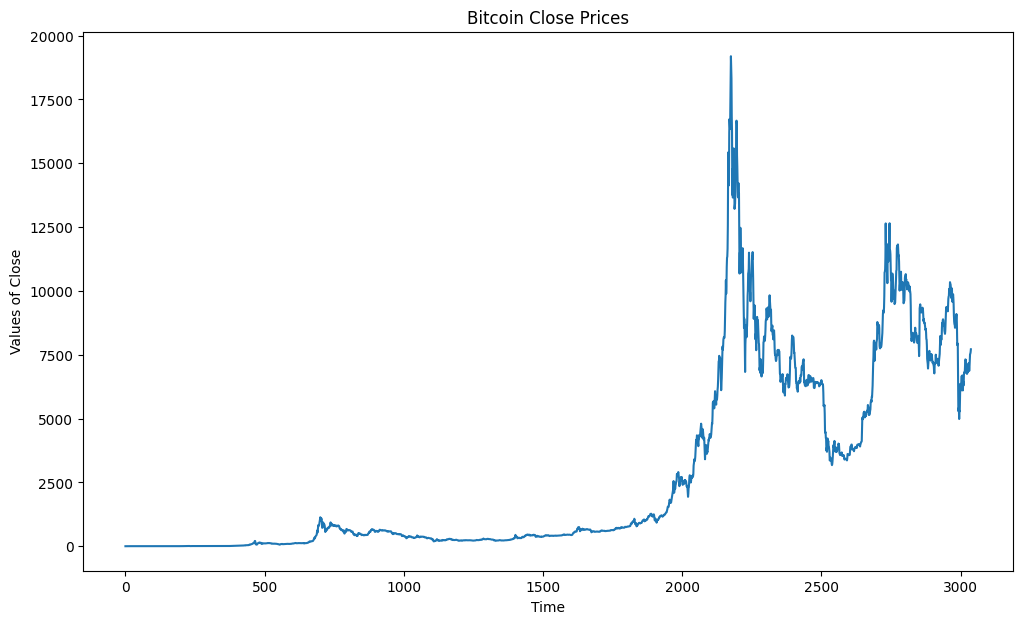

In [ ]:
plt.figure(figsize = (12, 7))
data_plot = df_train.loc[:, ["Close"]].values
plt.plot(data_plot)
plt.xlabel("Time")
plt.ylabel("Values of Close")
plt.title("Bitcoin Close Prices")
plt.show()



In [ ]:
dataset = df_train.loc[:, ["Close"]].values
dataset.shape

(3038, 1)

In [ ]:
dataset = dataset.reshape(-1, 1)
dataset

array([[4.48250000e+00],
       [4.80666667e+00],
       [5.00000000e+00],
       ...,
       [7.54446235e+03],
       [7.60318996e+03],
       [7.71557924e+03]])

In [ ]:
#change type
dataset = dataset.astype("float32")
dataset.shape

(3038, 1)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
data_scaled = scaler.fit_transform(dataset)
data_scaled

array([[7.8616577e-06],
       [2.4757654e-05],
       [3.4834418e-05],
       ...,
       [3.9300156e-01],
       [3.9606249e-01],
       [4.0192038e-01]], dtype=float32)

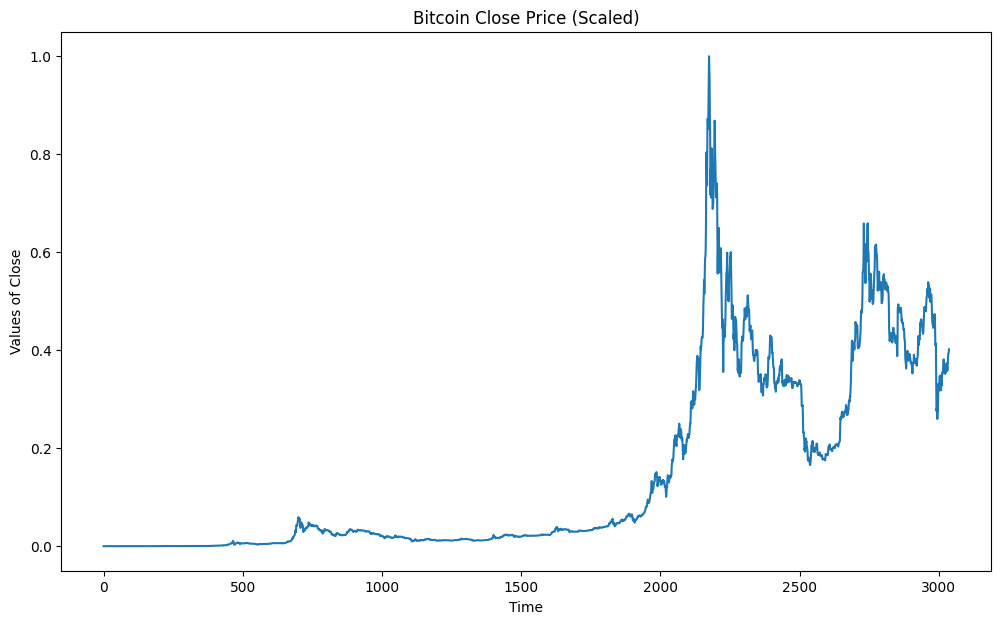

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(data_scaled)
plt.xlabel("Time")
plt.ylabel("Values of Close")
plt.title("Bitcoin Close Price (Scaled)")
plt.show()



In [ ]:
# We divide the DATA_SCALED by Training %75, Test %25
#train_size = int(len(data_scaled) * 0.75)
#test_size = len(data_scaled) - train_size
#data_scaled_train = data_scaled[0:train_size, :]
#data_scaled_test = data_scaled[train_size:len(data_scaled), :]

#print("data_scaled_train size: {}\ndata_scaled_test size: {}". format(len(data_scaled_train), len(data_scaled_test)))
#print("data_scaled_train shape: {}\ndata_scaled_test shape: {}". format(data_scaled_train.shape, data_scaled_test.shape))

In [ ]:
# We divide the DATA_SCALED by Training %80, Test %20
train_size = int(len(data_scaled) * 0.80)
test_size = len(data_scaled) - train_size
data_scaled_train = data_scaled[0:train_size, :]
data_scaled_test = data_scaled[train_size:len(data_scaled), :]

In [ ]:
print("data_scaled_train size: {}\ndata_scaled_test size: {}". format(len(data_scaled_train), len(data_scaled_test)))
print("data_scaled_train shape: {}\ndata_scaled_test shape: {}". format(data_scaled_train.shape, data_scaled_test.shape))

data_scaled_train size: 2430
data_scaled_test size: 608
data_scaled_train shape: (2430, 1)
data_scaled_test shape: (608, 1)


In [ ]:
# Creating a data structure with 10 time_step and 1 output
#X_train = []
#y_train = []
#time_step = 10
#for i in range(time_step, data_scaled.shape[0]):
#    X_train.append(data_scaled[i-time_step:i, 0])
#    y_train.append(data_scaled[i, 0])
#X_train, y_train = np.array(X_train), np.array(y_train)

#print("X_train shape: ", X_train.shape)
#print("y_train shape: ", y_train.shape)

In [ ]:
# Creating a data structure with 10 time_step and 1 output (TRAIN)
time_step = 10
dataX = []
dataY = []
for i in range(len(data_scaled_train) - time_step - 1):
    a = data_scaled_train[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(data_scaled_train[i + time_step, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)

print("trainX shape: {}\ntrainY shape: {}". format(trainX.shape, trainY.shape))

trainX shape: (2419, 10)
trainY shape: (2419,)


In [ ]:
# Creating a data structure with 10 time_step and 1 output (TEST)
dataX = []
dataY = []
for i in range(len(data_scaled_test) - time_step -1):
    a = data_scaled_test[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(data_scaled_test[i + time_step, 0])
testX = np.array(dataX)
testY = np.array(dataY)

print("testX shape: {}\ntestY shape: {}". format(testX.shape, testY.shape))

testX shape: (597, 10)
testY shape: (597,)


In [ ]:
# Reshaping to 3D
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [ ]:
print("X_train shape: ",trainX.shape)
print("X_test shape: ",testX.shape)

X_train shape:  (2419, 1, 10)
X_test shape:  (597, 1, 10)


In [ ]:
print("X_train shape: ",trainX.shape)
print("y_train shape: ",trainY.shape)

X_train shape:  (2419, 1, 10)
y_train shape:  (2419,)


In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation

In [ ]:
# Creating a data structure with 10 time_step and 1 output (TRAIN)
#time_step = 10
#dataX = []
#dataY = []
#for i in range(len(data_scaled_train) - time_step - 1):
#    a = data_scaled_train[i:(i + time_step), 0]
#    dataX.append(a)
#    dataY.append(data_scaled_train[i + time_step, 0])
#trainX = np.array(dataX)
#trainY = np.array(dataY)

#print("trainX shape: {}\ntrainY shape: {}". format(trainX.shape, trainY.shape))


In [ ]:
# Creating a data structure with 10 time_step and 1 output (TEST)
#dataX = []
#dataY = []
#for i in range(len(data_scaled_test) - time_step -1):
#    a = data_scaled_test[i:(i + time_step), 0]
#    dataX.append(a)
#    dataY.append(data_scaled_test[i + time_step, 0])
#testX = np.array(dataX)
#testY = np.array(dataY)

#print("testX shape: {}\ntestY shape: {}". format(testX.shape, testY.shape))



In [ ]:
# Reshaping to 3D
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#print("X_train shape: ",trainX.shape)
#print("X_test shape: ",testX.shape)

In [ ]:
# model
model = Sequential()
model.add(LSTM(256, input_shape = (1, time_step))) # 256 LSTM neuron(block)
model.add(Dropout(0.3))
model.add(Dense(1))
#model.compile(loss= "mean_squared_error", optimizer = "adam")
#model.fit(trainX, trainY, epochs=100, batch_size=50)

In [ ]:
#model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mse'])


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
cp = ModelCheckpoint(filepath="LSTM_traffic.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = model.fit(trainX, trainY, batch_size = 50, epochs=102, validation_data=(testX, testY),  verbose=1,  callbacks=[cp, tb]).history

Epoch 1/102
49/49 [==============================] - 4s 25ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2/102
49/49 [==============================] - 1s 13ms/step - loss: 5.4285e-04 - mse: 5.4285e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3/102
49/49 [==============================] - 1s 18ms/step - loss: 5.9440e-04 - mse: 5.9440e-04 - val_loss: 8.4826e-04 - val_mse: 8.4826e-04
Epoch 4/102
49/49 [==============================] - 1s 19ms/step - loss: 5.7360e-04 - mse: 5.7360e-04 - val_loss: 7.4856e-04 - val_mse: 7.4856e-04
Epoch 5/102
49/49 [==============================] - 1s 18ms/step - loss: 5.4630e-04 - mse: 5.4630e-04 - val_loss: 6.7314e-04 - val_mse: 6.7314e-04
Epoch 6/102
49/49 [==============================] - 1s 16ms/step - loss: 5.2125e-04 - mse: 5.2125e-04 - val_loss: 8.4543e-04 - val_mse: 8.4543e-04
Epoch 7/102
49/49 [==============================] - 1s 18ms/step - loss: 4.2050e-04 - mse: 4.2050e-04 - val_loss: 5.7445e-04 - val_mse:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               273408    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 273,665
Trainable params: 273,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_predict = model.predict(testX, batch_size=50)

12/12 [==============================] - 0s 3ms/step


In [ ]:
def generate_metrics(y_true, y_pred):
    return (
        f"MAE: {round(mean_absolute_error(y_true, y_pred), 9)}",
        f"MSE: {round(mean_squared_error(y_true, y_pred), 9)}",
        f"RMSE: {round(sqrt(mean_squared_error(y_true, y_pred)), 9)}",
        f"R2: {round(r2_score(y_true, y_pred), 9)}",
        f"EV: {round(explained_variance_score(y_true, y_pred), 9)}",
        f"MAPE: {round(mean_absolute_percentage_error(y_true, y_pred), 9)}",
         #f"AC: {round(accuracy_score(y_true, y_pred), 9)}"
    )

In [ ]:
lstm_metrics = generate_metrics(testY, lstm_predict)



In [ ]:
print("\nMetrics:")
print(f"LSTM:\t{lstm_metrics}")


Metrics:
LSTM:	('MAE: 0.016809185966849327', 'MSE: 0.0004206709854770452', 'RMSE: 0.020510271191596985', 'R2: 0.97275609', 'EV: 0.987360716', 'MAPE: 0.04842669516801834')


In [ ]:
loss, accuracy = model.evaluate(testX, testY)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss,100 - accuracy*100))


19/19 [==============================] - 0s 3ms/step - loss: 4.2067e-04 - mse: 4.2067e-04

Loss: 0.00, Accuracy: 99.96%


In [ ]:
testY.shape

(597,)

In [ ]:
lstm_predict.shape

(597, 1)

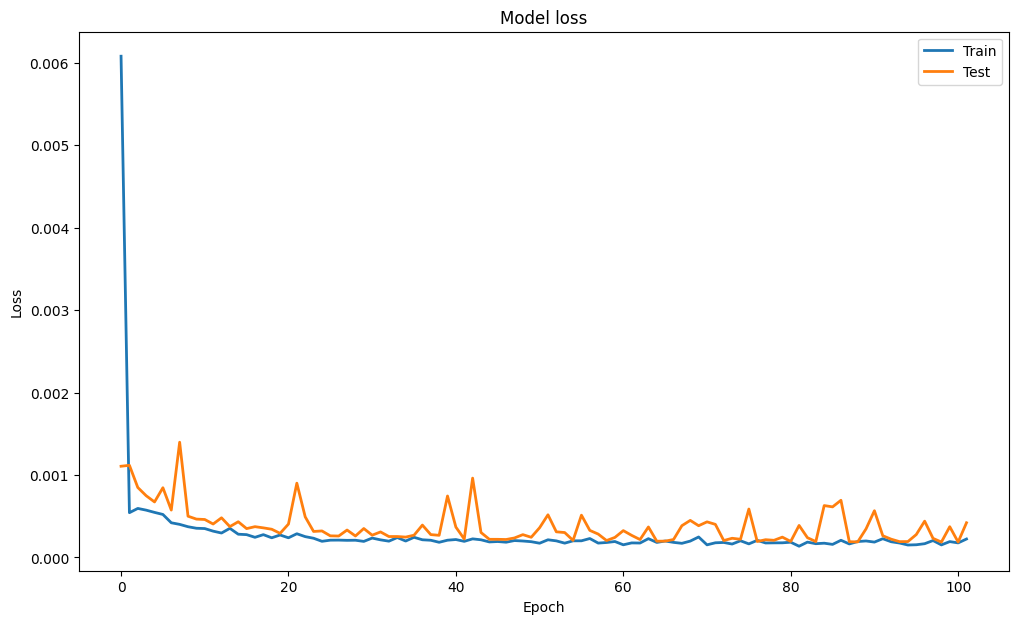

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY_ = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_ = scaler.inverse_transform([testY])

# calculate root mean squared error
trainscore = math.sqrt(mean_squared_error(trainY_[0], trainPredict[:, 0]))
print("Train Score: %.2f RMSE" % (trainscore))
testscore = math.sqrt(mean_squared_error(testY_[0], testPredict[:, 0]))
print("Test Score: %.2f RMSE" % (testscore))

19/19 [==============================] - 0s 2ms/step
Train Score: 234.76 RMSE
Test Score: 393.51 RMSE


In [ ]:
trainPredict

array([[  96.499535],
       [  96.48324 ],
       [  96.86291 ],
       ...,
       [6819.159   ],
       [6978.082   ],
       [6967.505   ]], dtype=float32)

In [ ]:
cd = model.predict(trainX)
cd

76/76 [==============================] - 0s 3ms/step


array([[0.00480391],
       [0.00480306],
       [0.00482285],
       ...,
       [0.3551978 ],
       [0.36348104],
       [0.36292976]], dtype=float32)

In [ ]:
y_pred = (model.predict(testX) > 0.2).astype("int32")


19/19 [==============================] - 0s 2ms/step


In [ ]:
testY = np.reshape(testY, (testX.shape[0], 1))
testY.shape


(597, 1)

In [ ]:
acs = []
y_proba = model.predict(testX)
y_pred = np.argmax(y_proba, axis=1)
y_pred_classes = np.argmax(y_proba, axis=1)
y_test_classes = np.argmax(testY, axis=1)
print('accuracy')
acc = accuracy_score(y_test_classes, y_pred_classes)
print(acc)
acs.append(acc)
#auc = roc_auc_score(y_test, y_proba, average='macro')
#print('AUC: %.2f' % auc)


19/19 [==============================] - 0s 3ms/step
accuracy
1.0


In [ ]:
precision_score(y_test_classes, y_pred_classes, average='macro')

1.0

In [ ]:
cm = confusion_matrix(y_test_classes, y_pred_classes)
print(cm)
print('Classification Report')
print(metrics.classification_report(y_test_classes, y_pred_classes))



[[597]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       597

    accuracy                           1.00       597
   macro avg       1.00      1.00      1.00       597
weighted avg       1.00      1.00      1.00       597



In [ ]:
from sklearn.metrics import recall_score
tpr = recall_score(y_test_classes, y_pred_classes)   # it is better to name it y_test
# to calculate, tnr we need to set the positive label to the other class
# I assume your negative class consists of 0, if it is -1, change 0 below to that value
tnr = recall_score(y_test_classes, y_pred_classes, pos_label = 0)
fpr = 1 - tnr
fnr = 1 - tpr

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(tpr)
print(tnr)
print(fpr)
print(fnr)

0.0
1.0
0.0
1.0


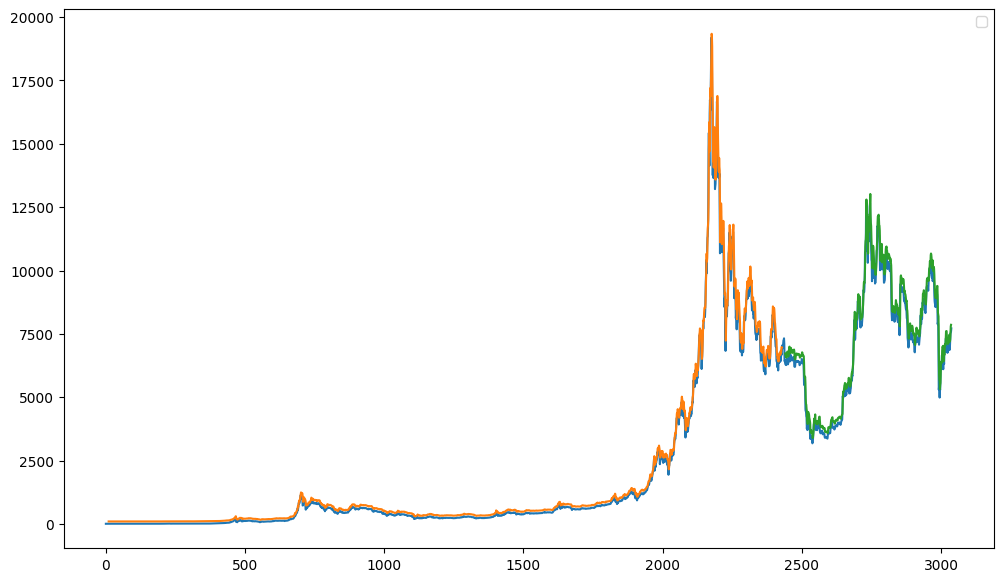

In [ ]:
# shifting train
trainPredictPlot = np.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(trainPredict) + time_step, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(data_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (time_step * 2) + 1:len(data_scaled) - 1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize = (12, 7))
plt.plot(scaler.inverse_transform(data_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
#plt.xlim(2500,3200)
plt.legend()
plt.show()

In [ ]:
x = scaler.inverse_transform(data_scaled)
x

array([[4.4825001e+00],
       [4.8066669e+00],
       [5.0000000e+00],
       ...,
       [7.5444624e+03],
       [7.6031899e+03],
       [7.7155791e+03]], dtype=float32)

In [ ]:

#print(trainPredict[2400:2418],bitcoin[2400:2418])


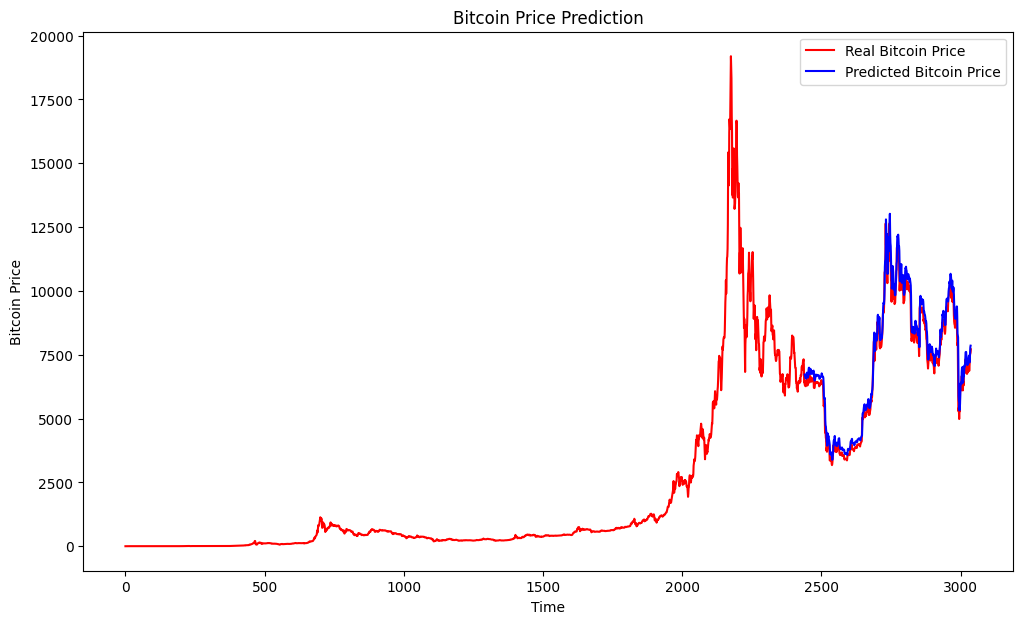

In [ ]:
# Visualising the results
plt.figure(figsize = (12, 7))
plt.plot(scaler.inverse_transform(data_scaled), color = 'red', label = 'Real Bitcoin Price')
plt.plot(testPredictPlot, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

In [ ]:
from numpy.ma.core import shape
c = testPredictPlot
c.shape
c

array([[      nan],
       [      nan],
       [      nan],
       ...,
       [7800.2886],
       [7857.5415],
       [      nan]], dtype=float32)

In [ ]:
Ttrain_size = int(len(grouped_data))
Tdf_train = grouped_data.iloc[0:Ttrain_size, :]
Tdf_train = grouped_data.iloc[0:Ttrain_size, :]
print("TDF_Train size: {}". format(len(Tdf_train)))

TDF_Train size: 3376


In [ ]:
Tdataset = Tdf_train.loc[:, ["Close"]].values
dataset.shape

(3038, 1)

In [ ]:
Tscaler = MinMaxScaler(feature_range = (0, 1))
Tdata_scaled = scaler.fit_transform(Tdataset)
Tdata_scaled

array([[2.49498698e-06],
       [7.85714133e-06],
       [1.10551357e-05],
       ...,
       [9.41389714e-01],
       [9.65105496e-01],
       [9.72198806e-01]])

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY_ = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
#testY_ = scaler.inverse_transform([testY])

# calculate root mean squared error
trainscore = math.sqrt(mean_squared_error(trainY_[0], trainPredict[:, 0]))
print("Train Score: %.2f RMSE" % (trainscore))
testscore = math.sqrt(mean_squared_error(testY_[0], testPredict[:, 0]))
print("Test Score: %.2f RMSE" % (testscore))

19/19 [==============================] - 0s 3ms/step
Train Score: 739.73 RMSE
Test Score: 17020.89 RMSE


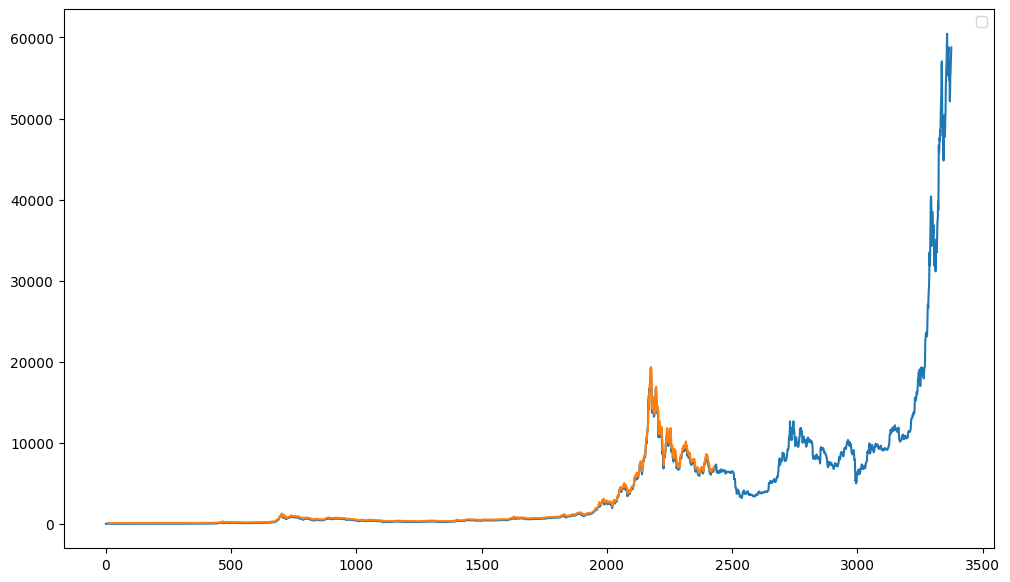

In [ ]:
# shifting train
TtrainPredictPlot = np.empty_like(Tdata_scaled)
TtrainPredictPlot[:, :] = np.nan
TtrainPredictPlot[time_step:len(trainPredict) + time_step, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(Tdata_scaled)
testPredictPlot[:, :] = np.nan
#testPredictPlot[len(trainPredict) + (time_step * 2) + 1:len(Tdata_scaled) - 1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize = (12, 7))
plt.plot(scaler.inverse_transform(Tdata_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
#plt.xlim(2500,3200)
plt.legend()
plt.show()

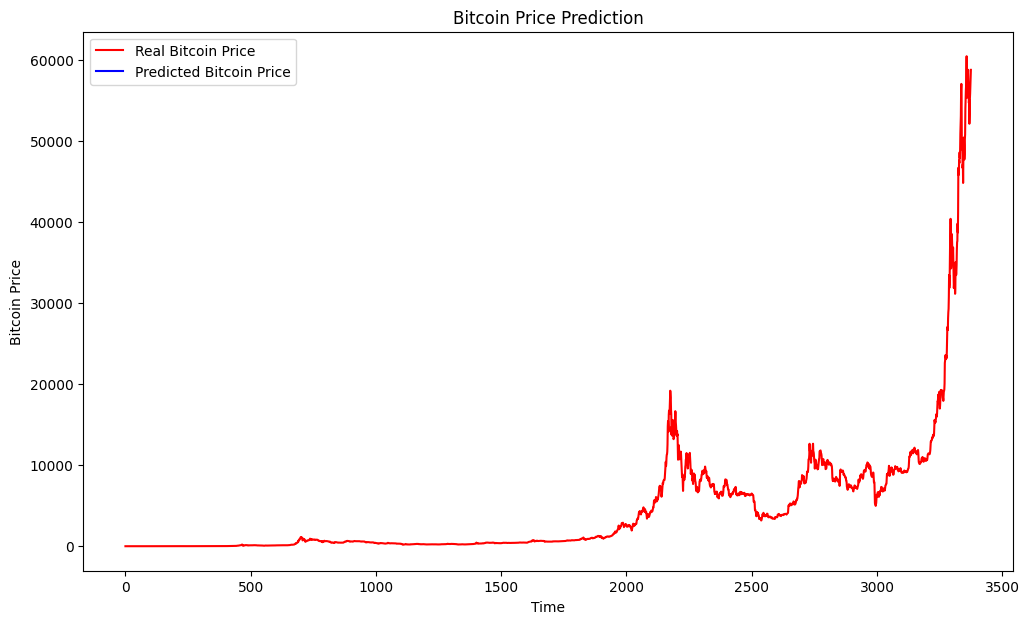

In [ ]:
# Visualising the results
plt.figure(figsize = (12, 7))
plt.plot(scaler.inverse_transform(Tdata_scaled), color = 'red', label = 'Real Bitcoin Price')
plt.plot(testPredictPlot, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()